<!-- vscode-jupyter-toc -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
<a id='toc0_'></a>**Содержание**    
- [Матмодель нейрона](#toc1_)    
  - [Теоретические задачи](#toc1_1_)    
- [Булевы операции в виде нейронов](#toc2_)    
    - [Оператор НЕ](#toc2_1_1_)    
    - [Оператор И](#toc2_1_2_)    
    - [Оператор ИЛИ](#toc2_1_3_)    
    - [Оператор искл.ИЛИ (XOR)](#toc2_1_4_)    
- [От нейрона к нейронной сети](#toc3_)    
    - [Сеть нейронов с линейной активацией](#toc3_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- /vscode-jupyter-toc -->

# <a id='toc1_'></a>[Матмодель нейрона](#toc0_)

**Нейрон** - клетка с некоторым количеством синапсов (точки входа сигналов от других нейронов) и одним аксоном (точка выхода сигнала данного нейрона). В биологии это далеко не единственная конфигурация клетки нейрона.

$$y = f(z) = f(w_1 x_1 + ... + w_n x_n + b) = f(\sum_{i=1}^n w_i x_i + b) = f(< \vec w, \vec x> + b)$$

$x_i$ - значения входных сигналов

$y$ - значение выходного сигнала данного нейрона

$z$ - суммарный выходной потенциал (?)

$f(.)$ - функция активации, свойство нейрона по возбуждению выходного сигнала в зависимости от суммарного выходного потенциала (?)

$w_i$ - веса нейрона, "сила" связей с другими нейронами, "сила синапсов"

$b$ - смещение, сколько сам нейрон добавляет к суммарному входному сигналу

**Пороговая функция активации (step)**:

$$f(z) = \begin{cases} 
0, & z \leq 0 \\
1, & z > 0
\end{cases}$$

- есть разрыв, не диффиренцируемая в этой точке

**Разделяющая поверхность** - совокупность возможных значений аргумента $z = 0$ при которых происходит смена значения функции активации. 
- Геометрическое место точек, где функция активации меняет свое значение (в любой $\epsilon$-окрестности любой из таких точек находятся два различных значения функции активации)
- Разделяющая поверхность является подмножеством пространства векторов $\vec x$ (линейной комбинацией) 


Для одного нейрона - это гиперплоскость $< \vec w, \vec x> + b = 0$. Эта гиперплоскость ортогональна вектору весов $\vec w$, и с той ее стороны, куда вектор весов направлен, значение функции ативации $=1$.


**Сигмоидная функция активации**

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

$$\lim_{x \rightarrow \infin} \sigma(x) = 1 \\
\lim_{x \rightarrow -\infin} \sigma(x) = 0 \\
\sigma(0) = 0.5$$

Можно добавить параметр (температура)

$$\sigma(x, T) = \frac{1}{1 + e^{-x/T}}$$

- при $T \rightarrow 0$ сигмоида стремится к пороговой функции

## <a id='toc1_1_'></a>[Теоретические задачи](#toc0_)

Чему равна производная сигмоидной функции активации?

In [17]:
import sympy as sp

x = sp.Symbol("x")

sig = 1 / (1 + sp.exp(-x))

sp.Set(sig, "->", sig.diff()) # +1-1 в числитель -> s(x) * (1 - s(x))

Set(1/(1 + exp(-x)), ->, exp(-x)/(1 + exp(-x))**2)

Найдите производную этой функции активации $th(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

In [21]:
th = (sp.exp(x) - sp.exp(-x)) / (sp.exp(x) + sp.exp(-x))

sp.Set(th, "->", th.diff()) # -> 1 - th^2

Set((exp(x) - exp(-x))/(exp(x) + exp(-x)), ->, (-exp(x) + exp(-x))*(exp(x) - exp(-x))/(exp(x) + exp(-x))**2 + 1)

# <a id='toc2_'></a>[Булевы операции в виде нейронов](#toc0_)

### <a id='toc2_1_1_'></a>[Оператор НЕ](#toc0_)

    x   !x
    1   0
    0   1

$$step(z) = \begin{cases} 
0, & z \leq 0 \\
1, & z > 0
\end{cases}$$

$$y(x) = step(w \cdot x + b)$$

$$\begin{cases} 
step(w + b) = 0 \\
step(b) = 1
\end{cases} 
\rightarrow
\begin{cases} 
w + b \leq 0 \\
b > 0 
\end{cases}
\rightarrow
\begin{cases} 
w \leq -b \\
b > 0 
\end{cases}$$


Например $\begin{cases} w = -1, \\b = 1\end{cases}$

### <a id='toc2_1_2_'></a>[Оператор И](#toc0_)

    x1  x2  x1&x2
    1   1   1
    1   0   0
    0   1   0
    0   0   0


$$y(x) = step(w_1 x_1 + w_2 x_2 + b)$$

$$\begin{cases} 
step(w_1 + w_2 + b) = 1 \\
step(w_1 + b) = 0 \\
step(w_2 + b) = 0 \\
step(b) = 0 
\end{cases} 
\rightarrow
\begin{cases} 
w_1 + w_2 + b > 0 \\
w_1 + b \leq 0 \\
w_2 + b \leq 0 \\
b \leq 0 
\end{cases}
\rightarrow
\begin{cases} 
w_1 + w_2 + b > 0 \\
w_1 \leq -b \\
w_2 \leq -b \\
b \leq 0 
\end{cases}$$

Например $\begin{cases} w_1 = w_2 = 0.6, \\b = -1\end{cases} \rightarrow 0.6 x_1 + 0.6 x_2 -1 = 0 \rightarrow x_2 = - x_1 + 1.66... $

Таким образом, получается **разделяющая поверхность**

<img src="./img/and.png" width="200">

### <a id='toc2_1_3_'></a>[Оператор ИЛИ](#toc0_)

    x1  x2  x1||x2
    1   1   1
    1   0   1
    0   1   1
    0   0   0


$$y(x) = step(w_1 x_1 + w_2 x_2 + b)$$

$$\begin{cases} 
step(w_1 + w_2 + b) = 1 \\
step(w_1 + b) = 1 \\
step(w_2 + b) = 1 \\
step(b) = 0 
\end{cases} 
\rightarrow
\begin{cases} 
w_1 + w_2 + b > 0 \\
w_1 + b > 0 \\
w_2 + b > 0 \\
b \leq 0 
\end{cases}
\rightarrow
\begin{cases} 
w_1 + w_2 > -b \\
w_1 > -b \\
w_2 > -b \\
b \leq 0 
\end{cases}$$

Например $\begin{cases} w_1 = w_2 = 1.1, \\b = -1\end{cases} \rightarrow 1.1 x_1 + 1.1 x_2 -1 = 0 \rightarrow x_2 = - x_1 + 0.9090909... $

Похожая разделяющая поверхность, но расположенная "чуть ниже"

<img src="./img/or.png" width="200">

### <a id='toc2_1_4_'></a>[Оператор искл.ИЛИ (XOR)](#toc0_)

    x1  x2  x1 XOR x2
    1   1   0
    1   0   1
    0   1   1
    0   0   0


$$y(x) = step(w_1 x_1 + w_2 x_2 + b)$$

$$\begin{cases} 
step(w_1 + w_2 + b) = 0\\
step(w_1 + b) = 1 \\
step(w_2 + b) = 1 \\
step(b) = 0 
\end{cases} 
\rightarrow
\begin{cases} 
w_1 + w_2 + b \leq 0 \\
w_1 + b > 0 \\
w_2 + b > 0 \\
b \leq 0 
\end{cases}
\rightarrow
\begin{cases} 
w_1 + w_2 \leq -b \\
w_1 > -b \\
w_2 > -b \\
b \leq 0 
\end{cases}$$

**Решения нет (в виде одного нейрона)**

Линейная разделяющая поверхность невозможна

<img src="./img/xor.png" width="200">

**Решение**

Представить операцию в виде нескольких нейронов

<img src="./img/5xor.png" width="400">

- Сеть позволяет сделать **нелинейную операцию** (построить нелинейную разделющую поверхность)
- Мы использовали 5 нейронов. Но для решения задачи можно использовать всего 3.

**Например (само придумалось)** $(x_1 НЕ.ИЛИ x_2) НЕ.ИЛИ (x_1 И x_2)$


    x1  x2  (x_1 НЕ.ИЛИ x_2) НЕ.ИЛИ (x1 И x2)   
    1   1   0                0       1
    1   0   0                1       0
    0   1   0                1       0
    0   0   1                0       0   

НЕ.ИЛИ - это типа ИЛИ, но с коэффициентами (весами) с обратным знаком.  
Если `neuron()` – модель нейрона с пороговой функцией активации, то например получим:

    neuron(-1.1 * neuron(-1.1 * x1 + -1.1 * x2 + 1) 
           - 1.1 * neuron(0.6 * x1 + 0.6 * x2 - 1) 
           + 1)
**Верно, но слишком сложно:**

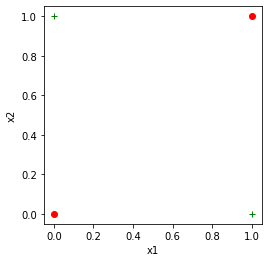

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x1x2 = np.array([[0,0],[1,0],[0,1],[1,1]])

def neuron(value):
    return 0 if value <= 0 else 1

for x1, x2 in x1x2:
    value = neuron(-1.1 * neuron(-1.1 * x1 + -1.1 * x2 + 1) \
           - 1.1 * neuron(0.6 * x1 + 0.6 * x2 - 1)  \
           + 1)
    value = neuron(neuron(-1*x1 + 1*x2 - 0.5) + neuron(1*x1 - 1*x2 - 0.5))
    value = neuron(2*neuron(x1 + x2) - neuron(x1) - x2)     # neuron(x1) == x1
    value = neuron(2*neuron(x1 + x2) - x1 - x2)             # т.е. фактически это 2 нейрона (со связями в обход слоя)
    value = neuron(neuron(x1-x2)+neuron(x2-x1))

    if (value > 0):
        plt.plot(x1, x2, '+', color="green")
    elif (value <= 0):
        plt.plot(x1, x2, 'o', color="red")

plt.gca().set_aspect('equal', adjustable='box')
            
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

# <a id='toc3_'></a>[От нейрона к нейронной сети](#toc0_)

На примере разделяющей поверхности XOR видно, что объединение нейронов (**линейных** элементов) в сети позволяет строить **нелинейные** поверхности разделяющие классы, более того, они могут образовывать не обязательныо связные области.

\* Сеть должна иметь нелинейную функцию активации, если хотим иметь "универсальный аппроксиматор" (Теорема Цыбенко, Теорема Колмогорова — Арнольда). 

### <a id='toc3_1_1_'></a>[Сеть нейронов с линейной активацией](#toc0_)

В простейшем случае это активация $f(z) = z$, но $f(z) = a z + b$ сути не поменяет.

**Например**:

Три нейрона ($y_1, y_2, y_3$) с функцией активации $f(z) = z$. Два в первом слое, один - во втором ($y_3$). И например 2 входа $x_1, x_2$

$$y_3 = w_2^3 y_2 + w_1^3 y_1 + b^3 = w_2^3 (w_1^2 x_1 + w_2^2 x_2 + b^2) + w_1^3 (w_1^1 x_1 + w_2^1 x_2 + b^1) + b^3 = x_1 \tilde w_1 + x_2 \tilde w_2 + \tilde b $$ 

Т.е. получаем просто **линейную комбинацию из входов**.

Осюда следует, что такой **полносвязный линейный слой имеет смысл добавлять в сеть только один**, т.к. многослойные конструкции все равно сведутся к линейной кобинации входов.

**Семинар** по основам торча в `./Neural_Networks_and_CV`